In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [7]:
train = pd.read_csv(r'C:\Users\Admin\Desktop\Data Science Stuff\miniprojects\TMDB Box office predictions\train.csv')
test = pd.read_csv(r'C:\Users\Admin\Desktop\Data Science Stuff\miniprojects\TMDB Box office predictions\test.csv')

In [8]:
pd.set_option('display.max_columns', 35)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth',25 )
pd.set_option('display.max_rows',20)


In [9]:
# Making data usable
#Belongs to collection: Not useful
#Homepage,imdb_id,title,overview,poster path,tagline,original title also useless
a = ['homepage','imdb_id','original_title','poster_path','overview','tagline','belongs_to_collection','spoken_languages']

train = train.drop(a,axis=1)
test = test.drop(a,axis=1)
# Budget
#train['budget'].isna().sum() 
#No missing values
#train.loc[train['budget']==0]
#812 movies have 0 budget ,need to fix that 
# Two options : do linear regression to find budget or remove the rows having 0 budget
#Try both options

#Popularity
#No missing values
def getRound(num):
    return round(num,2)
train['popularity'] = train['popularity'].apply(getRound)
test['popularity'] = test['popularity'].apply(getRound)

#original language
#As most of the movies are in english(2575 out of 3000), we can just separate them into en and foriegn
train['OGLanguage_en'] = (train['original_language']=='en')
test['OGLanguage_en'] = (test['original_language']=='en')

train=train.drop(['original_language'],axis=1)
test=test.drop(['original_language'],axis=1)



#Status
train['status'].value_counts()
train.loc[train['status']=='Released','status']=1
train.loc[train['status']=='Rumored','status']=0

test.loc[test['status']=='Released','status']=1
test.loc[test['status']=='Post Production','status']=0
test.loc[test['status']=='Rumored','status']=0
test.loc[test['status'].isna(),'status']=[0,0]

In [10]:
#Release Date
#Month and year of release are made into separate columns
def getMonth(date):
    return(date.split('/')[0].strip())
def getYear(date):
    return(date.split('/')[2].strip())
train['release_month']=  train['release_date'].apply(getMonth)
train['release_year']=  train['release_date'].apply(getYear)
train= train.drop(['release_date'],axis=1)
train['release_month']=pd.to_numeric(train['release_month'])
train['release_year']=pd.to_numeric(train['release_year'])

train.groupby(['release_month'])['revenue'].agg([np.mean]).sort_values(by = 'mean',ascending=False)
train.loc[(train['release_month']==12) | (train['release_month']==6) | (train['release_month']==7 ),'release_month'] =  [13]
train.loc[(train['release_month']==3) | (train['release_month']==8) | (train['release_month']==11 ) | (train['release_month']==2 ),'release_month'] = [14]
train.loc[(train['release_month']==5) | (train['release_month']==4) | (train['release_month']==10),'release_month'] =  [15]
train.loc[(train['release_month']==9) | (train['release_month']==1) ,'release_month'] =  [16]
train.loc[(train['release_month']==13) ,'release_month'] =  [3]
train.loc[(train['release_month']==14) ,'release_month'] =  [2]
train.loc[(train['release_month']==15) ,'release_month'] =  [1]
train.loc[(train['release_month']==16) ,'release_month'] =  [0]

a = train.groupby(['release_year'])['revenue'].agg([np.mean]).sort_values(by = 'mean',ascending=False)
b = np.array(a.index)
train['year']=0
for i in range(0,len(a)):
    train.loc[train['release_year']==np.array(a.index)[i],'year']=int((90-i)/10)
    
train = train.drop(['release_year'],axis=1)

test.loc[test['release_date'].isna(),'release_date']='05/10/00'
test['release_month']=  test['release_date'].apply(getMonth)
test['release_year']=  test['release_date'].apply(getYear)
test= test.drop(['release_date'],axis=1)
test['release_month']=pd.to_numeric(test['release_month'])
test['release_year']=pd.to_numeric(test['release_year'])

test.loc[(test['release_month']==12) | (test['release_month']==6) | (test['release_month']==7 ),'release_month'] =  [13]
test.loc[(test['release_month']==3) | (test['release_month']==8) | (test['release_month']==11 ) | (test['release_month']==2 ),'release_month'] = [14]
test.loc[(test['release_month']==5) | (test['release_month']==4) | (test['release_month']==10),'release_month'] =  [15]
test.loc[(test['release_month']==9) | (test['release_month']==1) ,'release_month'] =  [16]
test.loc[(test['release_month']==13) ,'release_month'] =  [3]
test.loc[(test['release_month']==14) ,'release_month'] =  [2]
test.loc[(test['release_month']==15) ,'release_month'] =  [1]
test.loc[(test['release_month']==16) ,'release_month'] =  [0]

test['year']=0
for i in range(0,len(a)):
    test.loc[test['release_year']==np.array(a.index)[i],'year']=int((90-i)/10)
test = test.drop(['release_year'],axis=1)    

In [11]:
#Genre
import ast
a=[]
#7 missing values
train.loc[(train['genres'].isna()) & (train['id']==471),'genres'] =("[{'id': 35, 'name': 'Adventure'}, {'id': 18, 'name': 'Drama'}]")
train.loc[(train['genres'].isna()) & (train['id']==1623),'genres'] =("[{'id': 35, 'name': 'Action'}, {'id': 18, 'name': 'Drama'}]")
train.loc[(train['genres'].isna()) & (train['id']==1815),'genres'] =("[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Fantasy'}]")
train.loc[(train['genres'].isna()) & (train['id']==1820),'genres'] =("[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Romance'}]")
train.loc[(train['genres'].isna()) & (train['id']==2424),'genres'] =("[{'id': 35, 'name': 'Romance'}, {'id': 18, 'name': 'Action'}]")
train.loc[(train['genres'].isna()) & (train['id']==2687),'genres'] =("[{'id': 35, 'name': 'Thriller'}, {'id': 18, 'name': 'Action'}]")
train.loc[(train['genres'].isna()) & (train['id']==2901),'genres'] = ("[{'id': 35, 'name': 'Drama'}, {'id': 18, 'name': 'Fantasy'}]")

#Making dummies
f= train.loc[train['genres'].isna()==False,'genres'] 
for i in f.index:
    b = ast.literal_eval(train['genres'][i])
    b = pd.DataFrame(b)
   
    for j in range(0,len(b['name'])):
        a.append(b['name'][j])
        
c = pd.DataFrame(pd.Series(a).value_counts(),columns=['freq'])


z = np.array(c.index)
z = z[0:17]

tra  = train['genres'].apply(lambda x: [pd.DataFrame(ast.literal_eval(x))][0] )
genre = pd.DataFrame(tra.apply(lambda x: np.array(x['name'])))
train['genre_other']=0
for i in range(0,len(z)):
    train['genre_'+z[i]]=0
    
for i in range(0,len(genre)):
    a = genre.loc[i,:][0]
    for j in range(0,len(a)):
        if a[j] in z:
            train['genre_'+a[j]][i]=1
        else :
            train['genre_other'][i]=1
train = train.drop(['genres'],axis=1)            

test.loc[(test['genres'].isna()) & (test['id']==3074),'genres'] =("[{'id': 35, 'name': 'Thriller'}, {'id': 18, 'name': 'Action'}]")
test.loc[(test['genres'].isna()) & (test['id']==3794),'genres'] =("[{'id': 35, 'name': 'Drama'}, {'id': 18, 'name': 'Indie Film'}]")
test.loc[(test['genres'].isna()) & (test['id']==3911),'genres'] =("[{'id': 35, 'name': 'Drama'}, {'id': 18, 'name': 'Indie Film'}]")
test.loc[(test['genres'].isna()) & (test['id']==3794),'genres'] =("[{'id': 35, 'name': 'Drama'}, {'id': 18, 'name': 'Documentary'}]")
test.loc[(test['genres'].isna()) & (test['id']==4222),'genres'] =("[{'id': 35, 'name': 'Action'}, {'id': 18, 'name': 'Drama'}]")
test.loc[(test['genres'].isna()) & (test['id']==4443),'genres'] =("[{'id': 35, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]")
test.loc[(test['genres'].isna()) & (test['id']==4616),'genres'] =("[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Farce'}]")
test.loc[(test['genres'].isna()) & (test['id']==4965),'genres'] =("[{'id': 35, 'name': 'Thriller'}, {'id': 18, 'name': 'Action'}]")
test.loc[(test['genres'].isna()) & (test['id']==5063),'genres'] =("[{'id': 35, 'name': 'Crime'}, {'id': 18, 'name': 'Action'}]")
test.loc[(test['genres'].isna()) & (test['id']==5119),'genres'] =("[{'id': 35, 'name': 'Drama'}, {'id': 18, 'name': 'Romance'}]")
test.loc[(test['genres'].isna()) & (test['id']==5214),'genres'] =("[{'id': 35, 'name': 'Documentary'}, {'id': 18, 'name': 'Family'}]")
test.loc[(test['genres'].isna()) & (test['id']==5252),'genres'] =("[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Animated'}]")
test.loc[(test['genres'].isna()) & (test['id']==5520),'genres'] =("[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Crime'}]")
test.loc[(test['genres'].isna()) & (test['id']==6450),'genres'] =("[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}]")
test.loc[(test['genres'].isna()) & (test['id']==6486),'genres'] =("[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Hip/hop'}]")
test.loc[(test['genres'].isna()) & (test['id']==6565),'genres'] =("[{'id': 35, 'name': 'Documentary'}, {'id': 18, 'name': 'Indie Film'}]")
test.loc[(test['genres'].isna()) & (test['id']==6818),'genres'] =("[{'id': 35, 'name': 'Drama'}, {'id': 18, 'name': 'Romance'}]")

tra  = test['genres'].apply(lambda x: [pd.DataFrame(ast.literal_eval(x))][0] )
genre = pd.DataFrame(tra.apply(lambda x: np.array(x['name'])))
test['genre_other']=0
for i in range(0,len(z)):
    test['genre_'+z[i]]=0
    
for i in range(0,len(genre)):
    a = genre.loc[i,:][0]
    for j in range(0,len(a)):
        if a[j] in z:
            test['genre_'+a[j]][i]=1
        else :
            test['genre_other'][i]=1
test = test.drop(['genres'],axis=1)


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [12]:
m = ['marvel comic', 'superhero', 'dc comics', '3d', 'super powers',
       'saving the world', 'based on comic', 'secret identity',
       'car race', 'witch', 'dinosaur', 'treasure', 'space', 'mutant',
       'castle', 'animation', 'aftercreditsstinger', 'outer space',
       'hero', 'talking animal', 'mountain', 'sequel', 'army', 'battle',
       'ship', 'france', 'duringcreditsstinger', 'magic', 'island',
       'jungle', 'marriage proposal', 'astronaut', 'conspiracy',
       'afterlife', 'sea', 'orphan', 'spy', 'based on young adult novel',
       'amnesia', 'terrorist', 'robot', 'marriage crisis', 'snow',
       'winter', 'survival', 'explosion', 'female protagonist',
       "love of one's life", 'dystopia', 'organized crime', 'rescue',
       'zombie', 'england', 'terrorism', 'undercover', 'assassin',
       'alien', 'washington d.c.', 'showdown', 'fbi agent',
       'san francisco', 'future', 'baby', 'weapon', 'fire', 'sniper',
       'midlife crisis', 'based on novel', 'florida', 'monster',
       'california', 'parent child relationship', 'corruption', 'torture',
       'android', 'boxer', 'on the run', 'based on video game',
       'world war i', 'motorcycle', 'dying and death',
       'death of a friend', 'dancing', 'wife husband relationship',
       'assassination', 'post-apocalyptic', 'demon', 'cia', 'government',
       'faith', 'father son relationship', 'wedding', 'scientist',
       'london england', 'holiday', 'brother sister relationship',
       'car chase', 'training', 'rivalry', 'rural setting', 'lovers',
       'vampire', 'family relationships', 'fbi',
       'sister sister relationship', 'artificial intelligence',
       'airplane', 'usa president', 'forbidden love', 'new york',
       'loss of father', 'romantic comedy', 'based on true events',
       'los angeles', 'racism', 'christmas', 'comedy', 'lawyer',
       'competition', 'fight', 'psychiatrist', 'based on tv series',
       'daughter', 'revenge', 'musical', 'violence', 'soldier', 'escape',
       'airport', 'pilot', 'time travel', 'satire', 'helicopter',
       'best friend', 'betrayal', 'secret', 'russia', 'prisoner',
       'suspense', 'china', 'bomb', 'hotel', 'deception', 'friendship',
       'reporter', 'marriage', 'mafia', 'alcoholic', 'chase', 'car crash',
       'psychopath', 'japan', 'martial arts', 'found footage', 'shootout',
       'military', 'teenage girl', 'street gang', 'crime',
       'investigation', 'paranoia', 'romance', 'killer', 'hostage',
       'friends', 'eroticism', 'hospital', 'priest', 'restaurant',
       'wilderness', 'ghost', 'mask', 'river', 'becoming an adult',
       'nazis', 'love triangle', 'detective', 'based on true story',
       'marijuana', 'computer', 'horse', 'child abuse', 'dog', 'spoof',
       'journalist', 'remake', 'politics', 'teenager', '1970s', 'paris',
       'new york city', 'train', 'hitman', 'jealousy', 'divorce',
       'funeral', 'cancer', 'new love', 'drug dealer', 'doctor', 'gun',
       'chicago', 'age difference', 'apartment', 'criminal', 'love',
       'australia', 'mother daughter relationship', 'summer', 'forest',
       'pregnancy', 'father daughter relationship', 'family', 'evil',
       'flashback', 'prison', 'death', 'war', 'police', 'fear', 'sport',
       'extramarital affair', 'gore', 'neo-noir', 'thief', 'money',
       'dark comedy', 'painting', 'puppet', 'adultery', 'relationship',
       'coming of age', 'party', 'world war ii', 'robbery',
       'hallucination', 'wheelchair', 'police officer', 'student',
       'small town', 'blackmail', 'kidnapping', 'high school',
       'male nudity', 'lie', 'murder', 'brother brother relationship',
       'road trip', 'historical figure', 'biography', 'obsession',
       'male female relationship', 'kung fu', 'college', 'blood', 'sex',
       'kiss', 'drug addiction', 'music', 'serial killer', 'suicide',
       'hoodlum', 'mobster', 'black people', 'based on play or musical',
       'sheriff', 'woman director', 'slasher', 'loneliness', 'gangster',
       'drug', 'alcohol', 'nudity', 'youth', 'rape', 'india', 'author',
       'motel', 'female nudity', 'baseball', 'desert', 'career', 'lgbt',
       'writer', 'infidelity', 'travel', 'prostitute', 'gang', 'cop',
       'suicide attempt', 'vacation', 'school', 'beach', 'gay', 'drama',
       'surrealism', 'teacher', 'dream', 'neighbor', 'waitress', 'texas',
       'homosexuality', 'incest', 'bar', 'lesbian', 'seduction',
       'independent film', 'film noir']
n = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
c=  pd.DataFrame(n,columns = ['rating'])
c['key'] = m

tra  = train['Keywords'].apply(lambda x: [pd.DataFrame(ast.literal_eval(x))][0] if pd.isna(x)==False else pd.DataFrame(['Nan'],columns=['name']) )
keys = pd.DataFrame(tra.apply(lambda x: np.array(x['name'])))
train['key_rate']=0.00
for i in np.array(keys.index):
    a=0
    for j in keys.iloc[i][0]:
        if j in np.array(c['key']):
            h= np.argwhere(np.array(c['key'])==j)[0][0]
            a = a + c.iloc[h]['rating']
    train.loc[i,'key_rate']=a
train = train.drop(['Keywords'],axis=1)    

tra  = test['Keywords'].apply(lambda x: [pd.DataFrame(ast.literal_eval(x))][0] if pd.isna(x)==False else pd.DataFrame(['Nan'],columns=['name']) )
keys = pd.DataFrame(tra.apply(lambda x: np.array(x['name'])))
test['key_rate']=0.00
for i in np.array(keys.index):
    a=0
    for j in keys.iloc[i][0]:
        if j in np.array(c['key']):
            h= np.argwhere(np.array(c['key'])==j)[0][0]
            a = a + c.iloc[h]['rating']
    test.loc[i,'key_rate']=a
test = test.drop(['Keywords'],axis=1)    

In [13]:
#production_companies
m = ['Hasbro Studios', 'Marvel Studios', 'Revolution Sun Studios','DC Entertainment', 'Jerry Bruckheimer Films', 'Heyday Films','WingNut Films', 'Syncopy', 'Pixar Animation Studios','Blue Sky Studios', 'Moving Picture Company (MPC)','Marvel Entertainment', 'Di Bonaventura Pictures','Walt Disney Feature Animation', 'Twentieth Century Fox Animation',
       'Temple Hill Entertainment', 'Roth Films', 'Lucasfilm','Fuji Television Network', 'Bad Hat Harry Productions','DreamWorks Animation', 'Maverick Films','The Saul Zaentz Company', 'Mandeville Films','Legendary Pictures', 'Sunswept Entertainment','Warner Bros. Pictures', 'Walt Disney', "Donners' Company",'Overbrook Entertainment', 'DC Comics', 'Dentsu',
       'Walt Disney Pictures', 'Skydance Productions', 'Genre Films','1492 Pictures', 'Atlas Entertainment', 'TSG Entertainment','Tim Burton Productions', 'Weed Road Pictures', 'Green Hat Films',
       'Eon Productions', 'Team Todd', 'Platinum Dunes','Sony Pictures Animation', 'Media Rights Capital','Kennedy Miller Productions', 'Marvel Enterprises','Blinding Edge Pictures', 'Centropolis Entertainment',
       'Amblin Entertainment', 'The Safran Company', 'Original Film','Kennedy/Marshall Company, The', 'Walden Media', 'GK Films','Stillking Films', 'Babelsberg Film', 'Big Screen Productions',
       'Home Box Office (HBO)', 'Brandywine Productions','DreamWorks SKG', 'Scott Free Productions', 'Icon Productions','Jerry Weintraub Productions', 'Davis-Films','Constantin Film Produktion', 'Dune Entertainment',
       'Nickelodeon Movies', 'Thunder Road Pictures','Zide-Perry Productions', 'Appian Way','RatPac-Dune Entertainment', 'Kopelson Entertainment','Ingenious Film Partners', 'Solana Films',
       'Sony Pictures Releasing', 'Studio Babelsberg', 'Playtone','Impact Pictures', "Mel's Cite du Cinema",'Happy Madison Productions', 'Northern Lights Entertainment','Gracie Films', 'Protozoa Pictures', 'Chernin Entertainment',
       'New Line Cinema', 'Village Roadshow Pictures', 'Escape Artists','LStar Capital', 'Initial Entertainment Group (IEG)', 'Avery Pix','Mace Neufeld Productions', 'Sony Pictures Entertainment (SPE)','Saturn Films', 'Konrad Pictures', 'Paramount Pictures',
       'Cross Creek Pictures', 'Apatow Productions','Imagine Entertainment', 'Summit Entertainment', 'Gunn Films','Warner Bros.', 'Columbia Pictures', 'Bluegrass Films','Baltimore Spring Creek Productions',
       'Michael De Luca Productions', 'Section Eight', 'De Line Pictures','Twentieth Century Fox Film Corporation', 'Gold Circle Films','CinéCinéma', 'Troublemaker Studios', 'Constantin Film',
        'Relativity Media', 'Anonymous Content', 'Universal Pictures','Cruise/Wagner Productions', 'Working Title Films','Spyglass Entertainment', 'Spring Creek Productions','New Regency Pictures', 'Davis Entertainment', 'MTV Films',
       'Regency Enterprises', 'Forward Pass', 'Interscope Communications','DisneyToon Studios', 'Dune Entertainment III','Fox 2000 Pictures', 'QED International', 'Mad Chance',
       'Rat Entertainment', 'Blumhouse Productions', 'Carolco Pictures','Flower Films (II)', 'DreamWorks', 'Big Talk Productions','Mutual Film Company', 'NPV Entertainment', 'Tribeca Productions','Reliance Entertainment', 'Polygram Filmed Entertainment',
       'Marv Films', 'Icon Entertainment International', 'FilmColony','Baltimore Pictures', 'Alcor Films', 'Ghost House Pictures','Annapurna Pictures', 'Intermedia Films', 'Kanzaman','Marc Platt Productions', 'Canal Plus', 'TF1 Films Production',
       'Closest to the Hole Productions', 'Gary Sanchez Productions','Screen Gems', 'Dark Horse Entertainment','Silver Screen Partners IV', 'Dino De Laurentiis Company','PolyGram Filmed Entertainment', 'Silver Pictures',
       'Revolution Studios', 'TriStar Pictures', 'Pathé Renn Productions','BenderSpink', 'Cold Spring Pictures', 'Newmarket Capital Group','Touchstone Pictures', 'Millennium Films',
       'Columbia Pictures Corporation', 'Vertigo Entertainment','Pacific Western', 'Lions Gate Films', 'Bona Fide Productions',
       'Alphaville Films', 'SLM Production Group',
       'Scott Rudin Productions', 'Lionsgate',
       'The Montecito Picture Company', 'Dimension Films', 'Gaumont',
       'Parkes+MacDonald Image Nation', 'Metro-Goldwyn-Mayer (MGM)',
       'Dark Castle Entertainment', 'uFilm', 'Goldcrest Pictures',
       'TV Tokyo', 'Jersey Films', 'Robert Simonds Productions',
       'Plan B Entertainment', 'Walt Disney Productions',
       'Mirage Enterprises', 'TF1 Films Productions', 'Miramax',
       'Alcon Entertainment', 'FilmDistrict', 'Ingenious Media',
       'The Mark Gordon Company', 'United Artists',
       'Castle Rock Entertainment', 'The Ladd Company', 'Nu Image Films',
       'Lakeshore Entertainment', 'Morgan Creek Productions',
       'Malpaso Productions', 'Sean S. Cunningham Films',
       '3 Arts Entertainment', 'Warner Bros. Animation',
       'Double Feature Films', 'Wildwood Enterprises', 'Miramax Films',
       'Hollywood Pictures',
       'Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA)',
       'Phoenix Pictures', 'StudioCanal', 'Chockstone Pictures',
       'Hyde Park Entertainment', 'DNA Films', 'Right of Way Films',
       'Rysher Entertainment', 'Cinergi Pictures Entertainment',
       'EuropaCorp', 'Fox Searchlight Pictures', 'Channel Four Films',
       'Bel Air Entertainment', 'Epsilon Motion Pictures',
       'Lorimar Film Entertainment', 'Canal+', 'Metropolitan Filmexport',
       'Rogue Pictures', 'Nick Wechsler Productions',
       'Lawrence Bender Productions', 'FilmEngine',
       'Artisan Entertainment', 'Open Road Films', 'Hyde Park Films',
       'Emmett/Furla Films', 'Mandalay Pictures',
       'River Road Entertainment', 'Scion Films', 'Bold Films',
       'France 3 Cinéma', 'Cheyenne Enterprises', 'CBS Films',
       'Gran Via Productions', 'Pathé', 'The Weinstein Company',
       'Exclusive Media Group', 'American Zoetrope', 'UK Film Council',
       'Propaganda Films', 'Affirm Films', 'Participant Media',
       'Bazelevs Production', 'Canal+ España', 'Universal Studios',
       'UTV Motion Pictures', 'LD Entertainment',
       'Imagenation Abu Dhabi FZ', 'Edward R. Pressman Film',
       'PalmStar Media', 'Franchise Pictures',
       'Sidney Kimmel Entertainment', 'BIM Distribuzione',
       'De Laurentiis Entertainment Group (DEG)', 'Paramount Vantage',
       'Orion Pictures', 'EMI Films Ltd.', 'Big Beach Films',
       'Why Not Productions', 'Goldcrest Films International',
       'Revelations Entertainment', 'Nelson Entertainment',
       'Likely Story', 'Focus Features', 'WWE Studios',
       'Intrepid Pictures', 'The Australian Film Commission', 'Film4',
       'Automatik Entertainment', 'Toho Company', 'Studio Canal',
       'Allied Filmmakers', 'John Wells Productions', 'Palace Pictures',
       'Westdeutscher Rundfunk (WDR)', 'Rai Cinema',
       'Industry Entertainment', 'CJ Entertainment', 'Focus Films',
       'Endgame Entertainment', 'Yari Film Group', 'BBC Films',
       'Film i Väst', 'RKO Radio Pictures',
       'Warner Independent Pictures (WIP)', 'British Screen Productions',
       'IM Global', 'Indian Paintbrush', 'Bavaria Film',
       'Golden Harvest Company', 'A24', 'Capitol Films', 'Cannon Group',
       '2929 Productions', 'The Mirisch Corporation', 'France 2 Cinéma',
       '40 Acres & A Mule Filmworks', 'Screen Australia', 'Ciné+',
       'Wild Bunch', 'FilmNation Entertainment', 'Sony Pictures Classics',
       'ApolloMedia Distribution', 'Savoy Pictures',
       'Dino de Laurentiis Cinematografica', 'Golan-Globus Productions',
       'The Criterion Collection', 'Fine Line Features',
       'Televisión Española (TVE)', 'Isle of Man Film',
       'Bórd Scannán na hÉireann', 'HandMade Films', 'Killer Films',
       'Metrol Technology', 'Arte France Cinéma', 'Central Partnership',
       'ARTE', 'British Film Institute (BFI)', 'Seven Arts Productions',
       'Emperor Motion Pictures', 'New World Pictures',
       'Egoli Tossell Film AG', 'Worldview Entertainment',
       'Magnolia Pictures', 'Paradox Entertainment', 'Parts and Labor',
       'Téléfilm Canada', 'TLA Releasing', 'MK2 Productions',
       'Lipsync Productions',
       'Centre National de la Cinématographie (CNC)']
n = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
c=  pd.DataFrame(n,columns = ['rating'])
c['company'] = m

tra  = train['production_companies'].apply(lambda x: [pd.DataFrame(ast.literal_eval(x))][0] if pd.isna(x)==False else pd.DataFrame(['Nan'],columns=['name']) )
keys = pd.DataFrame(tra.apply(lambda x: np.array(x['name'])))
train['company_rate']=0.00
for i in np.array(keys.index):
    a=0
    for j in keys.iloc[i][0]:
        if j in np.array(c['company']):
            h= np.argwhere(np.array(c['company'])==j)[0][0]
            a = a + c.iloc[h]['rating']
    train.loc[i,'company_rate']=a
train = train.drop(['production_companies'],axis=1)   

tra  = test['production_companies'].apply(lambda x: [pd.DataFrame(ast.literal_eval(x))][0] if pd.isna(x)==False else pd.DataFrame(['Nan'],columns=['name']) )
keys = pd.DataFrame(tra.apply(lambda x: np.array(x['name'])))
test['company_rate']=0.00
for i in np.array(keys.index):
    a=0
    for j in keys.iloc[i][0]:
        if j in np.array(c['company']):
            h= np.argwhere(np.array(c['company'])==j)[0][0]
            a = a + c.iloc[h]['rating']
    test.loc[i,'company_rate']=a
test = test.drop(['production_companies'],axis=1)    

In [14]:
m = ['Slovenia', 'New Zealand', 'Malta', 'Taiwan', 'Iceland',
       'Paraguay', 'Uruguay', 'Czech Republic', 'United Arab Emirates',
       'Poland', 'United States of America', 'Canada', 'Germany', 'China',
       'United Kingdom', 'Bulgaria', 'Hong Kong', 'Australia',
       'South Africa', 'Singapore', 'Morocco', 'Japan', 'Bahamas',
       'Hungary', 'Cambodia', 'Italy', 'France', 'Turkey', 'Mexico',
       'Spain', 'Croatia', 'Austria', 'Ireland', 'Belgium', 'India',
       'Romania', 'Luxembourg', 'Peru', 'Portugal', 'Tunisia', 'Serbia',
       'South Korea', 'Russia', 'Switzerland', 'Denmark', 'Argentina',
       'Pakistan', 'Sweden', 'Greece', 'Chile', 'Costa Rica',
       'Netherlands', 'Ukraine', 'Finland', 'Namibia', 'Israel',
       'Mongolia', 'Brazil', 'Qatar', 'Ghana', 'Burkina Faso', 'Norway',
       'Saudi Arabia', 'Jordan', 'Indonesia', 'Serbia and Montenegro',
       'Algeria', 'Puerto Rico', 'Iran', 'Bosnia and Herzegovina',
       'Ethiopia', 'Philippines', 'Mauritania', 'Cyprus']
n = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0]
c=  pd.DataFrame(n,columns = ['rating'])
c['country'] = m

tra  = train['production_countries'].apply(lambda x: [pd.DataFrame(ast.literal_eval(x))][0] if pd.isna(x)==False else pd.DataFrame(['Nan'],columns=['name']) )
keys = pd.DataFrame(tra.apply(lambda x: np.array(x['name'])))
train['country_rate']=0.00
for i in np.array(keys.index):
    a=0
    for j in keys.iloc[i][0]:
        if j in np.array(c['country']):
            h= np.argwhere(np.array(c['country'])==j)[0][0]
            a = a + c.iloc[h]['rating']
    train.loc[i,'country_rate']=a
train = train.drop(['production_countries'],axis=1)    

tra  = test['production_countries'].apply(lambda x: [pd.DataFrame(ast.literal_eval(x))][0] if pd.isna(x)==False else pd.DataFrame(['Nan'],columns=['name']) )
keys = pd.DataFrame(tra.apply(lambda x: np.array(x['name'])))
test['country_rate']=0.00
for i in np.array(keys.index):
    a=0
    for j in keys.iloc[i][0]:
        if j in np.array(c['country']):
            h= np.argwhere(np.array(c['country'])==j)[0][0]
            a = a + c.iloc[h]['rating']
    test.loc[i,'country_rate']=a
test = test.drop(['production_countries'],axis=1)    

In [15]:
m = ['Hugo Weaving', 'Ian McKellen', 'Christopher Lee', 'Idris Elba',
       'Vin Diesel', 'Judi Dench', 'Stellan Skarsg√•rd',
       'John Ratzenberger', 'Glenn Morshower', 'Cate Blanchett',
       'Djimon Hounsou', 'Scarlett Johansson', 'Sean Bean', 'Elijah Wood',
       'Frank Welker', 'Samuel L. Jackson', 'Johnny Depp', 'Mark Ruffalo',
       'Robbie Coltrane', 'Ken Jeong', 'Josh Brolin', 'Bill Hader',
       'Stephen Root', 'Michelle Rodriguez', 'Toby Jones', 'Zoe Saldana',
       'Geoffrey Rush', 'Stanley Tucci', 'Bradley Cooper', 'Daniel Craig',
       'Ewan McGregor', 'Natalie Portman', 'Jeffrey Wright',
       'Robert Downey Jr.', 'Jim Cummings', 'Anthony Mackie',
       'Kurt Russell', 'Patrick Stewart', 'Desmond Llewelyn',
       'Dwayne Johnson', 'Tom Cruise', 'Gary Oldman', 'Viggo Mortensen',
       'Cillian Murphy', 'Hugh Jackman', 'William Fichtner',
       'Kevin Costner', 'James Earl Jones', 'Kevin Dunn', 'John Cleese',
       'Jim Broadbent', 'Tom Hanks', 'Tony Shalhoub', 'Famke Janssen',
       'John Turturro', 'Philip Ettington', 'Jack Black', 'Harrison Ford',
       'Seth Green', 'John Malkovich', 'Cheech Marin', 'Eugene Levy',
       'Jamie Foxx', 'John Leguizamo', 'Michael Madsen',
       'Sylvester Stallone', 'Mark Wahlberg', 'Jon Voight',
       'Michael Papajohn', 'Diane Keaton', 'Jason Statham', 'Halle Berry',
       'Arnold Schwarzenegger', 'Jane Lynch', 'Bill Nighy',
       'Rachael Harris', 'Octavia Spencer', 'Ed Harris', 'Michael Caine',
       'George Clooney', 'Anthony Hopkins', 'Gwyneth Paltrow', 'Jay Leno',
       'Cameron Diaz', 'Michael Pe√±a', 'Jim Carrey', 'Sandra Bullock',
       'Pierce Brosnan', 'Tilda Swinton', 'Christian Bale',
       'Sigourney Weaver', 'Russell Crowe', 'Frank Grillo',
       'Adam Sandler', 'Harry Dean Stanton', 'Jason Bateman',
       'Jonah Hill', 'Paul Giamatti', 'Tom Wilkinson', 'John C. Reilly',
       'Owen Wilson', 'Brad Pitt', 'Terry Crews', 'Chris Cooper',
       'Jackie Chan', 'Morgan Freeman', 'Amy Adams', 'John Goodman',
       'Benicio del Toro', 'Allison Janney', 'Philip Baker Hall',
       'Matt Damon', 'Aaron Eckhart', 'Carla Gugino', 'Joe Chrest',
       'Jamie Bell', 'Matthew Broderick', 'Sean Connery', 'Wallace Shawn',
       'Giovanni Ribisi', 'Liam Neeson', 'Diane Lane', 'Willem Dafoe',
       'Channing Tatum', 'Michael Douglas', 'James Remar', 'Judy Greer',
       'Peter Stormare', 'Michael Keaton', 'Mel Gibson',
       'Whoopi Goldberg', 'Steve Zahn', 'Melissa McCarthy',
       'Steve Buscemi', 'Kevin Spacey', 'Milla Jovovich', 'Al Pacino',
       'Eddie Murphy', 'Julia Roberts', 'Brad Dourif', 'Woody Harrelson',
       'Robert Redford', 'John Michael Higgins', 'Donald Sutherland',
       'Marisa Tomei', 'Robin Williams', 'Alec Baldwin', 'James Cromwell',
       'John Travolta', 'Bette Midler', 'Jeremy Piven', 'Meg Ryan',
       'Luis Guzm√°n', 'Brendan Gleeson', 'Helen Mirren',
       'Elizabeth Banks', 'Nicole Kidman', 'Antonio Banderas',
       'J.K. Simmons', 'Kurt Fuller', 'Laura Linney', 'Nicolas Cage',
       'Brian Cox', 'John Hurt', 'Danny DeVito', 'James Woods',
       'Charlize Theron', 'Naomi Watts', 'John Hawkes',
       'Laurence Fishburne', 'Jessica Chastain', 'Colin Farrell',
       'John C. McGinley', 'Melissa Leo', 'Cary Elwes', 'Jennifer Lopez',
       'Dan Aykroyd', 'Jennifer Connelly', 'Rachel Weisz',
       'Denzel Washington', 'Thomas Haden Church', 'Bruce Willis',
       'Greg Kinnear', 'Dennis Haysbert', 'Danny Huston', 'Ben Stiller',
       'Harvey Keitel', 'Richard Jenkins', 'Richard Gere',
       'Philip Seymour Hoffman', 'Robert Patrick', 'Kevin Bacon',
       'Jeff Bridges', 'Kathryn Hahn', 'Christopher Walken',
       'Julianne Moore', 'Cliff Curtis', 'Edward Norton', 'Kathy Bates',
       'Dustin Hoffman', 'Charlton Heston', 'Bill Paxton', 'Eddie Marsan',
       'Jeff Daniels', 'Bruce McGill', 'Steve Martin', 'Terence Stamp',
       'Joaquin Phoenix', 'Val Kilmer', 'Amanda Peet', 'Bruce Greenwood',
       'Nick Nolte', 'William H. Macy', 'Gene Hackman', 'Danny Trejo',
       'Kirsten Dunst', 'Ben Affleck', 'James Caan', 'Vince Vaughn',
       'Angela Bassett', 'Frank Langella', 'Barry Pepper',
       'Ciar√°n Hinds', 'Robert Duvall', 'Drew Barrymore', 'Viola Davis',
       'Wesley Snipes', 'Bill Pullman', 'Rance Howard', 'Bill Murray',
       'Ryan Gosling', 'Christopher Plummer', 'Tim Curry', 'Dean Norris',
       'Oliver Platt', 'Catherine Keener', 'Michael Shannon', 'Paul Rudd',
       'Ice Cube', 'Colleen Camp', 'Dan Hedaya', 'Ashley Judd',
       'Meryl Streep', 'William Hurt', 'Kiefer Sutherland',
       'Chlo√´ Grace Moretz', 'Ray Liotta', 'Alfred Molina',
       'Joe Pantoliano', 'Keanu Reeves', 'Robert De Niro', 'Olivia Wilde',
       'Rosario Dawson', "Denis O'Hare", 'James Gandolfini',
       'Winona Ryder', 'James Franco', 'Charlie Sheen',
       'Ren√©e Zellweger', 'Mark Strong', 'Tim Robbins', 'Dennis Quaid',
       'Frances Conroy', 'Beth Grant', 'David Koechner', 'David Jensen',
       'Keith David', 'Adam Scott', 'Clint Eastwood', 'Stacy Keach',
       'Sean Penn', 'Eva Mendes', 'Toni Collette', 'Ron Perlman',
       'Mickey Rourke', 'Guy Pearce', 'Susan Sarandon', 'Mike Starr',
       'Matthew McConaughey', 'Gabriel Byrne', 'Jim Belushi',
       'Ben Kingsley', 'Forest Whitaker', 'Timothy Olyphant',
       'Ethan Hawke', "Vincent D'Onofrio", 'John Lithgow', 'Justin Long',
       'Kathy Baker', 'John Cusack', 'Brian Dennehy', 'Richard E. Grant',
       'Joseph Gordon-Levitt', 'Dennis Hopper']
n = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0]
c=  pd.DataFrame(n,columns = ['rating'])
c['actor'] = m

tra  = train['cast'].apply(lambda x: [pd.DataFrame(ast.literal_eval(x))][0] if ((pd.isna(x)==False) and (x!='[]')) else pd.DataFrame(['Nan'],columns=['name']) )
keys = pd.DataFrame(tra.apply(lambda x: np.array(x['name'])))
train['actor_rate']=0.00
for i in np.array(keys.index):
    a=0
    for j in keys.iloc[i][0]:
        if j in np.array(c['actor']):
            h= np.argwhere(np.array(c['actor'])==j)[0][0]
            a = a + c.iloc[h]['rating']
    train.loc[i,'actor_rate']=a
train = train.drop(['cast'],axis=1)    

tra  = test['cast'].apply(lambda x: [pd.DataFrame(ast.literal_eval(x))][0] if ((pd.isna(x)==False) and (x!='[]')) else pd.DataFrame(['Nan'],columns=['name']) )
keys = pd.DataFrame(tra.apply(lambda x: np.array(x['name'])))
test['actor_rate']=0.00
for i in np.array(keys.index):
    a=0
    for j in keys.iloc[i][0]:
        if j in np.array(c['actor']):
            h= np.argwhere(np.array(c['actor'])==j)[0][0]
            a = a + c.iloc[h]['rating']
    test.loc[i,'actor_rate']=a
test = test.drop(['cast'],axis=1)    

In [16]:
m = ['George Lucas', 'John Lasseter', 'Andrew Stanton', 'Peter Jackson',
       'Frank Marshall', 'Christopher Nolan', 'Andrew Adamson',
       'Steven Spielberg', 'Michael Bay', 'Brad Bird', 'Carlos Saldanha',
       'Bryan Singer', 'Mel Gibson', 'Nancy Meyers', 'Chris Columbus',
       'George Miller', 'M. Night Shyamalan', 'Robert Zemeckis',
       'Sylvester Stallone', 'James Wan', 'Judd Apatow', 'Nora Ephron',
       'Todd Phillips', 'Chris Wedge', 'Robert Rodriguez',
       'Neill Blomkamp', 'Tony Gilroy', 'Chris Weitz', 'Francis Lawrence',
       'Ridley Scott', 'Gore Verbinski', 'Ivan Reitman',
       'Paul W.S. Anderson', 'Paul Haggis', 'Jon Turteltaub',
       'Bill Condon', 'Quentin Tarantino', 'Sam Mendes', 'Brett Ratner',
       'Jonathan Mostow', 'Luc Besson', 'Wolfgang Petersen',
       'Brian Helgeland', 'Kevin Reynolds', 'Edward Zwick', 'Joel Coen',
       'Alejandro Gonz√°lez I√±√°rritu', 'Darren Aronofsky',
       'Harold Ramis', 'Lilly Wachowski', 'Lana Wachowski',
       'David Dobkin', 'Michael Mann', 'Roland Emmerich', 'David Fincher',
       'Chuck Russell', 'David O. Russell', 'George Clooney',
       'Marc Forster', 'James Mangold', 'Sydney Pollack',
       'James McTeigue', 'Tim Burton', 'Martin Campbell', 'Ben Affleck',
       'Jerry Zucker', 'Ron Howard', 'Mel Brooks', 'Paul Weitz',
       'Walter Hill', 'Paul Verhoeven', 'Andrzej Bartkowiak',
       'Francis Ford Coppola', 'Tom Shadyac', 'Raja Gosnell',
       'Tommy Wirkola', 'David Ayer', 'Ben Stiller', 'Amy Heckerling',
       'Tony Scott', 'Peter Segal', 'Stephen Chow', 'Steven Soderbergh',
       'Gary Goldman', 'Bobby Farrelly', 'Peter Farrelly',
       'Cameron Crowe', 'Antoine Fuqua', 'Richard Donner', 'John Glen',
       'Tim Story', 'Sam Raimi', 'Rob Reiner', 'Mike Nichols',
       'Jason Reitman', 'Brian Robbins', 'Barry Levinson', 'Harald Zwart',
       'Peter Berg', 'John Landis', 'Robert Redford', 'Clint Eastwood',
       'Mark Waters', 'Stanley Kubrick', 'Paul Greengrass',
       'Joe Carnahan', 'Louis Leterrier', 'Roger Spottiswoode',
       'Sofia Coppola', 'Frank Coraci', 'David Mamet', 'Joe Johnston',
       'Alexander Payne', 'Doug Liman', 'Ariel Schulman', 'Henry Joost',
       'Hideaki Anno', 'Zhang Yimou', 'Tyler Perry', 'John Woo',
       'Alan Parker', 'Stephen Hopkins', 'Nick Cassavetes',
       'Michael Apted', 'Jonathan Levine', 'Woody Allen', 'Steve Carr',
       'John G. Avildsen', 'F. Gary Gray', 'John Singleton', 'Rob Cohen',
       'Roger Michell', 'Timur Bekmambetov', 'Garry Marshall',
       'Peter Weir', 'Brian Levant', 'Oliver Stone',
       'Michael Caton-Jones', 'S. Shankar', 'William Friedkin',
       'Joel Schumacher', 'Gary Fleder', 'Taylor Hackford',
       'Andy Fickman', 'Donald Petrie', 'Wes Craven', 'Mike Flanagan',
       'Peter Chelsom', 'Lasse Hallstr√∂m', 'Herbert Ross',
       'John Carpenter', 'Robert Luketic', 'Neil Jordan',
       'Pedro Almod√≥var', 'Tsui Hark', 'Phillip Noyce', 'Allen Hughes',
       'Michael Cimino', 'Peter Hyams', 'Hal Needham', 'Jonathan Demme',
       'Harold Becker', 'Renny Harlin', 'Wes Anderson',
       'George P. Cosmatos', 'Don Bluth', 'Greg Mottola', 'Bob Clark',
       'Robert Altman', 'Simon Wells', 'Jane Campion', 'Kunihiko Yuyama',
       'Brian De Palma', 'Joe Wright', 'Terry Gilliam', 'Robert Benton',
       'Shawn Levy', 'Richard Attenborough', 'Joe Dante',
       'Penny Marshall', 'Joseph Ruben', 'Gregory Hoblit',
       'Michael Lembeck', 'Malcolm D. Lee', 'Martin Scorsese',
       'Arthur Hiller', 'Simon West', 'Randal Kleiser', 'Hideo Nakata',
       'Bruce Beresford', 'Guy Ritchie', 'Roger Donaldson',
       'David Bowers', 'Wilson Yip', 'Frank Oz', 'Danny Cannon',
       'Simon Wincer', 'Steve Miner', 'George Roy Hill', 'David R. Ellis',
       'Jonathan Lynn', 'William Dear', 'Richard Linklater',
       'Kevin Smith', 'Stephen Herek', 'Ted Kotcheff', 'Guy Hamilton',
       'Gus Van Sant', 'Kevin Macdonald', 'Andrew Fleming',
       'Blake Edwards', 'Park Chan-wook', 'Terrence Malick',
       'Jodie Foster', 'Thomas Carter', 'Ron Shelton',
       'Oliver Hirschbiegel', 'Tom McCarthy', 'Tamra Davis',
       'Peter Yates', 'Noah Baumbach', 'C√©dric Klapisch', 'Steve Pink',
       'Charlie Chaplin', 'Jaume Balaguer√≥', 'Lone Scherfig',
       'Craig Gillespie', 'Carl Franklin', 'Mani Ratnam',
       'David Cronenberg', 'Jay Chandrasekhar', 'Spike Lee',
       'John Huston', 'Charles Stone III', 'Cary Fukunaga',
       'Brad Anderson', 'Carl Reiner', 'Howard Deutch', 'Ron Underwood',
       'Luis Mandoki', 'Alfred Hitchcock', 'Sidney Lumet', 'Robert Wise',
       'Billy Wilder', 'Mark Rydell', 'John Dahl', 'Jim Sheridan',
       'Uwe Boll', 'Rick Rosenthal', 'John Waters', 'Ferzan Ozpetek',
       'John Frankenheimer', 'J. Lee Thompson', 'Steve Rash',
       'Todd Haynes', 'David Raynr', 'Ralph Bakshi', 'Martha Coolidge',
       'Howard Hawks', 'Adam Wingard', 'Wim Wenders', 'John Sturges',
       'Michael Lehmann', 'Richard Rich', 'Shinji Aramaki',
       'Fran√ßois Truffaut', 'Sam Liu', 'Elia Kazan', 'Michael Dowse',
       'Olivier Assayas', 'Sam Peckinpah', 'Godfrey Reggio',
       'Eloy de la Iglesia', 'Bernard Rose']
n = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
c=  pd.DataFrame(n,columns = ['rating'])
c['director'] = m

tra  = train['crew'].apply(lambda x: [pd.DataFrame(ast.literal_eval(x))][0] if ((pd.isna(x)==False) and (x!='[]')) else pd.DataFrame(['Nan'],columns=['name']) )
for i in range(0,len(tra)):
    if len(tra[i].columns)==7:
        tra[i]=tra[i].loc[tra[i]['job']=='Director']
keys = pd.DataFrame(tra.apply(lambda x: np.array(x['name'])))
train['director_rate']=0.00
for i in np.array(keys.index):
    a=0
    for j in keys.iloc[i][0]:
        
        if j in np.array(c['director']):
            h= np.argwhere(np.array(c['director'])==j)[0][0]
            a = a + c.iloc[h]['rating']
    train.loc[i,'director_rate']=a
train = train.drop(['crew'],axis=1)    

tra  = test['crew'].apply(lambda x: [pd.DataFrame(ast.literal_eval(x))][0] if ((pd.isna(x)==False) and (x!='[]')) else pd.DataFrame(['Nan'],columns=['name']) )
for i in range(0,len(tra)):
    if len(tra[i].columns)==7:
        tra[i]=tra[i].loc[tra[i]['job']=='Director']
keys = pd.DataFrame(tra.apply(lambda x: np.array(x['name'])))
test['director_rate']=0.00
for i in np.array(keys.index):
    a=0
    for j in keys.iloc[i][0]:
        
        if j in np.array(c['director']):
            h= np.argwhere(np.array(c['director'])==j)[0][0]
            a = a + c.iloc[h]['rating']
    test.loc[i,'director_rate']=a
test = test.drop(['crew'],axis=1)    

In [17]:
train = train.drop(['id','title'],axis=1)
test = test.drop(['id','title'],axis=1)

train.loc[train['runtime'].isna(),'runtime'] = [130,107]
train['revenue'] = np.log1p(train['revenue'])
test.loc[test['runtime'].isna(),'runtime'] = [93,90,100,90]


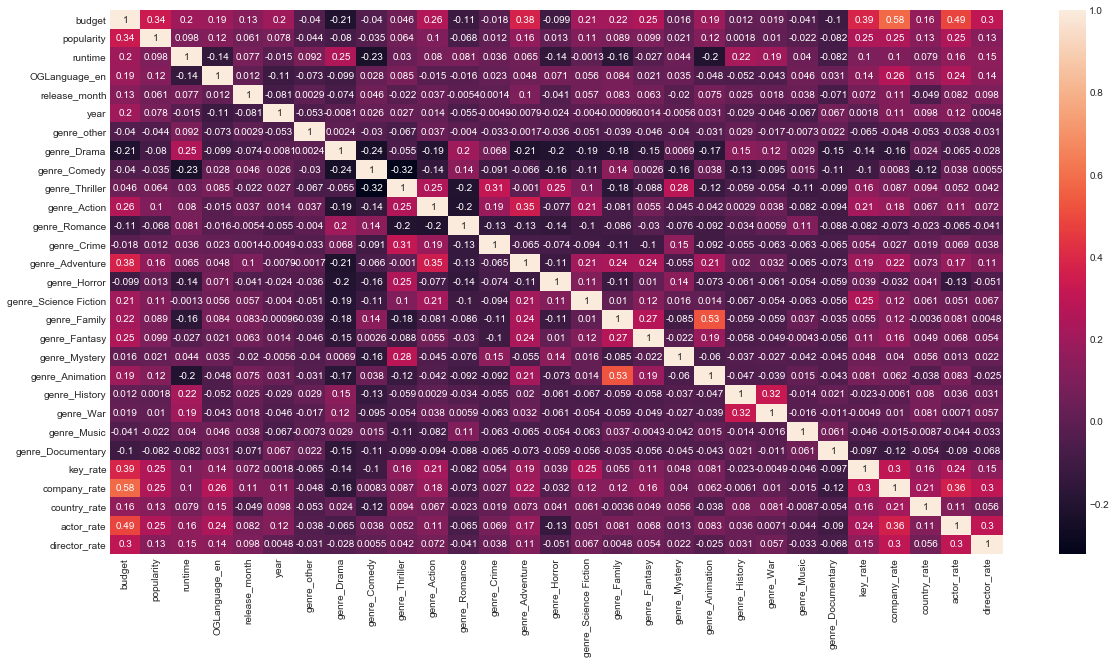

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10))
sns.heatmap(test.corr(),annot=True)

In [21]:
train['budget']= np.log1p(train['budget'])
a  =np.array(train.loc[train['revenue']<4.61].index)
train = train.drop(a,axis=0)

In [23]:
test['budget']= np.log1p(test['budget'])


In [26]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error
train['status'] = train['status'].astype('int8')
test['status'] = test['status'].astype('int8')

x = train.drop(['revenue'],axis=1)
y = train['revenue']
test_id = pd.read_csv(r'C:\Users\Admin\Desktop\Data Science Stuff\miniprojects\TMDB Box office predictions\test.csv')
model = XGBRegressor(random_state=42,n_estimators=78,learning_rate=0.08,nthread=4,max_depth=6,min_child_weight=7,subsample=0.8,gamma=0.7,reg_alpha=0,reg_lambda=0,base_score=0.5,colsample_bylevel=1,colsample_bynode=1,booster='gbtree',tree_method='exact')

model.fit(x,y)
xgb_test = model.predict(test)
xgb_test = np.expm1(xgb_test)
my_submission = pd.DataFrame({'id': test_id['id'], 'Revenue': xgb_test})
my_submission.to_csv('xgb_submission.csv', index=False)

